In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.datasets import load_breast_cancer 
import seaborn as sns
from matplotlib.colors import ListedColormap
import os, sys
sys.path.append(r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\default')
sys.path.append(r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\default\External_Files')
#custom functions
import my_functions
from cf_matrix import make_confusion_matrix

In [2]:
workdir = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\HW2_LogisticReg'
data_dir = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\default\DataSets'
graph_dir = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\HW2_LogisticReg\HW2_Graphs'
HW2_data = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\HW2_LogisticReg\HW2_Data'

In [3]:
# Read Data Into CSV 
os.chdir(data_dir)
df_d = pd.read_csv('diabetes.csv')
# create cancer df (df_c)
breast_data = load_breast_cancer().data
breast = pd.DataFrame(load_breast_cancer().data)
breast_labels = load_breast_cancer().target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
df_c=pd.DataFrame(final_breast_data)
features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
df_c.columns = features_labels

In [4]:
df_c

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


# Cleansing of the Data 

In [5]:
Y_d = df_d.loc[:, df_d.columns == 'Outcome']
X_d = df_d.loc[:, df_d.columns != 'Outcome' ]
# Standardizes Data 
X_d = my_functions.clense_data(X_d,stand = True)
# Split Data:
X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X_d, Y_d, test_size = .2, random_state = 69)



c:\Users\noaht\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [6]:
# Split Data:
Y_c = df_c.loc[:, df_c.columns == 'label']
X_c = df_c.loc[:, df_c.columns != 'label' ]
# Standardizes Data 
X_c = my_functions.clense_data(X_c, stand = True)
# Split Data:
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size = .2, random_state = 69)

c:\Users\noaht\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [7]:
# needed variables 
results = pd.DataFrame({'Accuracy': [], 'Precision': [], 'Recall': [] })


# Logistic Regression 

-Draw your training results,
-including loss and classification accuracy over iterations.
-Also, report your results, including accuracy, precision, and recall. 
-At the  end, plot the confusion matrix representing your binary classifier.

In [8]:
def log_reg(X_train, Y_train, X_test, random_val = 69, cross_val = False, cs = 10, weight='none'):
    if cross_val:
         classifier = LogisticRegressionCV(random_state = random_val, Cs = cs)
    else:
        classifier = LogisticRegression(random_state = random_val , penalty= weight)
        
    classifier = classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    return Y_pred

In [9]:
def log_reg_stats(Y_test, Y_pred): 
    con_matrix = confusion_matrix(Y_test, Y_pred)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    return con_matrix, accuracy, precision, recall 

# Diabetes Data Set 

c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


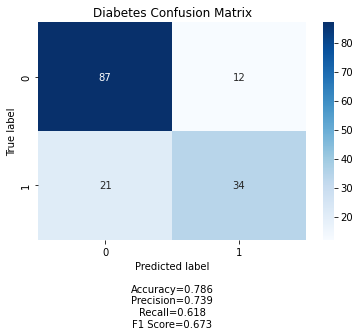

In [10]:

Y_pred_d = log_reg(X_train_d, Y_train_d, X_test_d)
cm_d, acc_d, prec_d, rec_d = log_reg_stats(Y_test_d,Y_pred_d)
make_confusion_matrix(cm_d,
                      title = 'Diabetes Confusion Matrix',
                      path = graph_dir + '/DiabetesCM.jpg')

In [11]:
# Label Headers 
results_d = results.copy()
results_d.loc[len(results_d.index)] = [acc_d, prec_d, rec_d]


## Diabetes Cross_Val

In [12]:
classifier = LogisticRegressionCV(random_state = 3, Cs = 5)
classifier = classifier.fit(X_d, Y_d)
Y_pred_d5 = classifier.predict(X_d)

c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


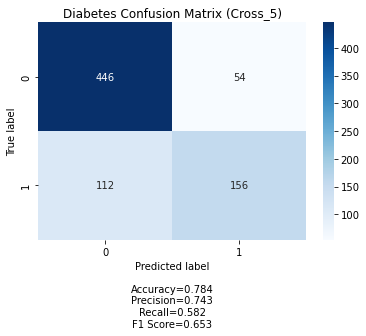

In [13]:
cm_d5, acc_d5, prec_d5, rec_d5 = log_reg_stats(Y_d, Y_pred_d5)
make_confusion_matrix(cm_d5,
                      title = 'Diabetes Confusion Matrix (Cross_5)',
                      path = graph_dir + '/DiabetesCM_Cross_Val_5.jpg')
results_d5 = results.copy()
results_d5.loc[len(results_d.index)] = [acc_d5, prec_d5, rec_d5]



In [14]:
classifier = LogisticRegressionCV(random_state = 3, Cs = 10)
classifier = classifier.fit(X_d, Y_d)
Y_pred_d10 = classifier.predict(X_d)

c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


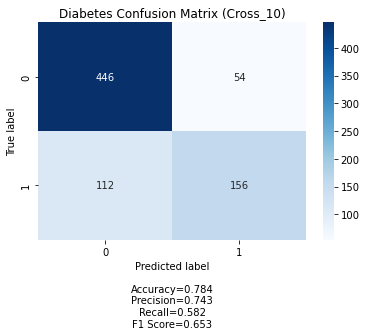

In [15]:
cm_d10, acc_d10, prec_d10, rec_d10 = log_reg_stats(Y_d, Y_pred_d10)
make_confusion_matrix(cm_d10,
                      title = 'Diabetes Confusion Matrix (Cross_10)',
                      path = graph_dir + '/DiabetesCM_Cross_Val_10.jpg')
results_d10 = results.copy()
results_d10.loc[len(results_d.index)] = [acc_d10, prec_d10, rec_d10]

# Cancer Logistic Regression 

c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


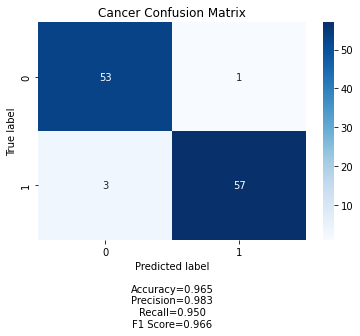

In [16]:
Y_pred_c = log_reg(X_train_c, Y_train_c, X_test_c)
cm_c, acc_c, prec_c, rec_c = log_reg_stats(Y_test_c,Y_pred_c)
make_confusion_matrix(cm_c,
                      title = 'Cancer Confusion Matrix',
                      path = graph_dir + '/CancerCM.jpg')

In [17]:
results_c = results.copy()
results_c.loc[len(results_c.index)] = [acc_c, prec_c, rec_c]

c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


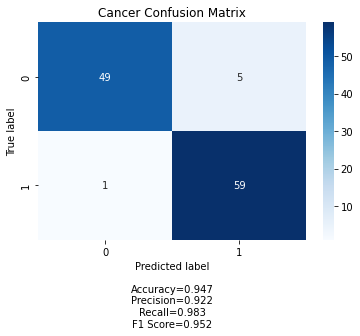

In [18]:
# Weighted 
Y_pred_cw = log_reg(X_train_c, Y_train_c, X_test_c, weight='l2')
cm_cw, acc_cw, prec_cw, rec_cw = log_reg_stats(Y_test_c,Y_pred_cw)
make_confusion_matrix(cm_cw,
                      title = 'Cancer Confusion Matrix',
                      path = graph_dir + '/CancerCMW.jpg')

In [19]:
results_cw = results.copy()
results_cw.loc[len(results_c.index)] = [acc_cw, prec_cw, rec_cw]

## Cancer Cross Validation

In [20]:

kfold_c5 = KFold(n_splits=5, random_state=0, shuffle=True)
model_c5 = LogisticRegression(random_state= 4)
Y_d_cross_pred_c5 = cross_val_predict(model_c5, X_c, Y_c, cv=kfold_c5)

c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

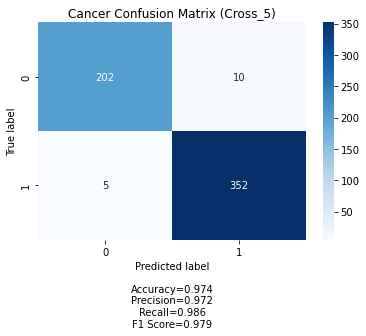

In [21]:
cm_c5, acc_c5, prec_c5, rec_c5 = log_reg_stats(Y_c, Y_d_cross_pred_c5)
make_confusion_matrix(cm_c5,
                      title = 'Cancer Confusion Matrix (Cross_5)',
                      path = graph_dir + '/CancerCM_Cross_Val_5.jpg')
results_c5 = results.copy()
results_c5.loc[len(results_d.index)] = [acc_c5, prec_c5, rec_c5]

In [22]:
print(results_c5.head())

   Accuracy  Precision    Recall
1  0.973638   0.972376  0.985994


In [23]:

kfold_c10 = KFold(n_splits=10, random_state=0, shuffle=True)
model_c10 = LogisticRegression(random_state= 4)
Y_d_cross_pred_c10 = cross_val_predict(model_c10, X_c, Y_c, cv=kfold_c10)

c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

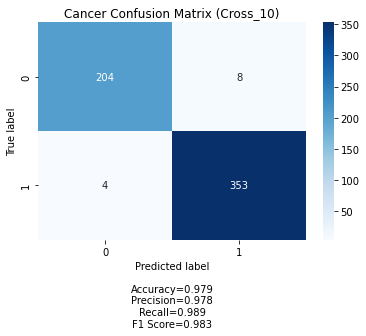

In [24]:
cm_c10, acc_c10, prec_c10, rec_c10 = log_reg_stats(Y_c, Y_d_cross_pred_c10)
make_confusion_matrix(cm_c10,
                      title = 'Cancer Confusion Matrix (Cross_10)',
                      path = graph_dir + '/CancerCM_Cross_Val_10.jpg')
results_c10 = results.copy()
results_c10.loc[len(results_d.index)] = [acc_c10, prec_c10, rec_c10]

In [25]:

kfold_c5w = KFold(n_splits=5, random_state=0, shuffle=True)
model_c5w = LogisticRegression(random_state= 4, penalty='l2')
Y_d_cross_pred_c5w = cross_val_predict(model_c5w, X_c, Y_c, cv=kfold_c5w)

c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

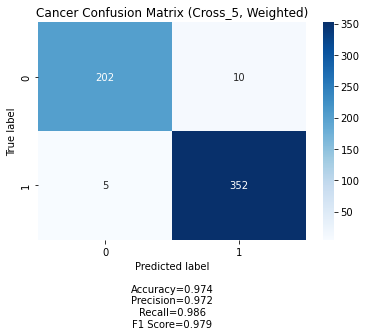

In [26]:
cm_c5w, acc_c5w, prec_c5w, rec_c5w = log_reg_stats(Y_c, Y_d_cross_pred_c5w)
make_confusion_matrix(cm_c5w,
                      title = 'Cancer Confusion Matrix (Cross_5, Weighted)',
                      path = graph_dir + '/CancerCM_Cross_Val_5_W.jpg')
results_c5w = results.copy()
results_c5w.loc[len(results_d.index)] = [acc_c5w, prec_c5w, rec_c5w]

In [27]:

kfold_c10w = KFold(n_splits=10, random_state=0, shuffle=True)
model_c10w = LogisticRegression(random_state= 4, penalty='l2')
Y_d_cross_pred_c10w = cross_val_predict(model_c10w, X_c, Y_c, cv=kfold_c10w)

c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

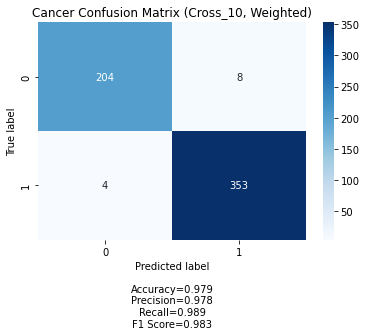

In [28]:
cm_c10w, acc_c10w, prec_c10w, rec_c10w = log_reg_stats(Y_c, Y_d_cross_pred_c10w)
make_confusion_matrix(cm_c10w,
                      title = 'Cancer Confusion Matrix (Cross_10, Weighted)',
                      path = graph_dir + '/CancerCM_Cross_Val_10_W.jpg')
results_c10w = results.copy()
results_c10w.loc[len(results_d.index)] = [acc_c10w, prec_c10w, rec_c10w]

In [29]:
result_array = [results_d, results_d5, results_d10, results_c, results_cw, results_c5, results_c10, results_c5w, results_c10w]
my_functions.create_data_table(result_array, path= HW2_data)

hello


In [30]:
print(results_c5.head(), results_c5w.head())

   Accuracy  Precision    Recall
1  0.973638   0.972376  0.985994    Accuracy  Precision    Recall
1  0.973638   0.972376  0.985994
